## importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Mall Customers dataset

In [3]:
df= pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df = df.rename({'Annual Income (k$)': 'Annual Income Dollars','Spending Score (1-100)':'Spending Score' }, axis=1)


In [7]:
df.describe()

,CustomerID,Age,Annual Income Dollars,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.describe(include=['O'])

,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
df.isnull().sum()

CustomerID               0
Gender                   0
Age                      0
Annual Income Dollars    0
Spending Score           0
dtype: int64

In [10]:
sum(df.duplicated())

0

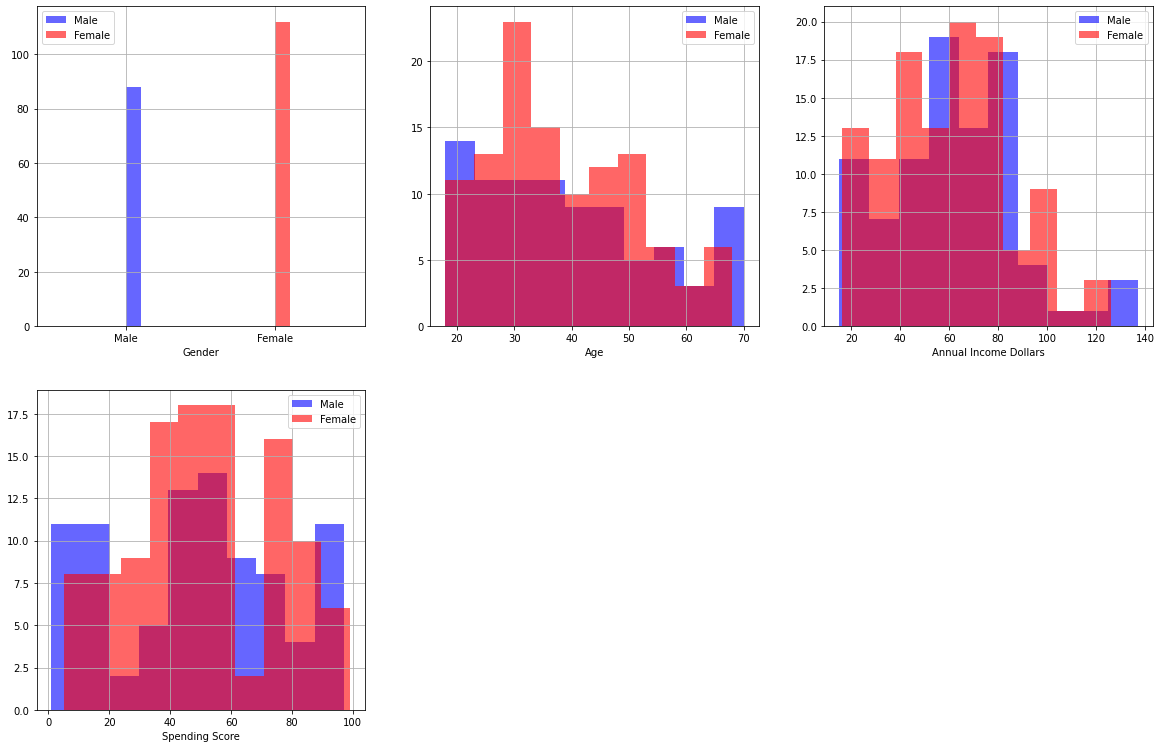

In [11]:
plt.figure(figsize=(20, 20))

df1=df.drop('CustomerID', axis=1)

for i, column in enumerate(df1.columns, 1):
    plt.subplot(3, 3, i)
    df1[df1["Gender"] == 'Male'][column].hist(bins=10, color='blue', label='Male', alpha=0.6)
    df1[df1["Gender"] == 'Female'][column].hist(bins=10, color='red', label='Female', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## data distribution

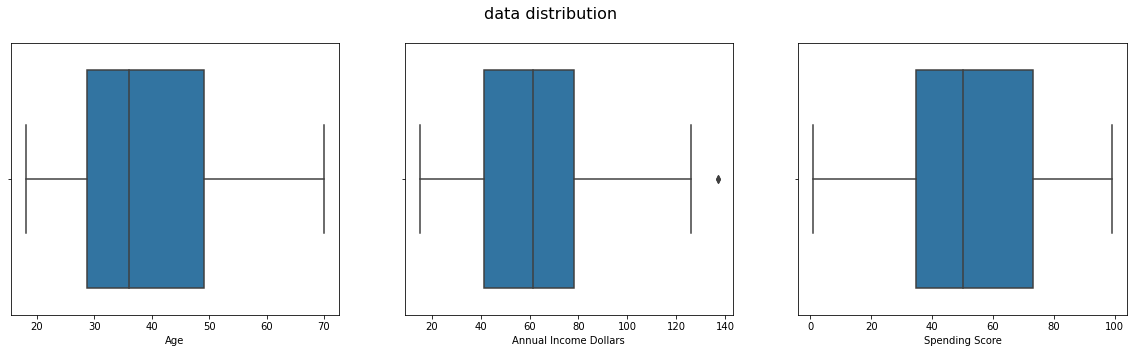

In [12]:
plt.figure(figsize=[20,5])
plt.suptitle('data distribution',fontsize = 16)


plt.subplot(1,3,1)
sns.boxplot(x=df['Age'])

plt.subplot(1,3,2)
sns.boxplot(x=df['Annual Income Dollars'])

plt.subplot(1,3,3)
sns.boxplot(x=df['Spending Score']);


## Annual income of male and female

<AxesSubplot:xlabel='Gender', ylabel='Annual Income Dollars'>

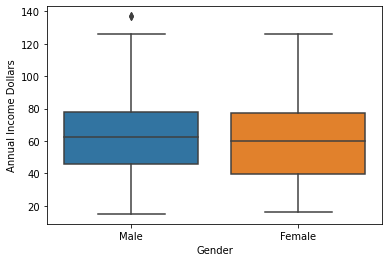

In [13]:
sns.boxplot(x=df['Gender'], y=df['Annual Income Dollars'])


## male vs female spending score

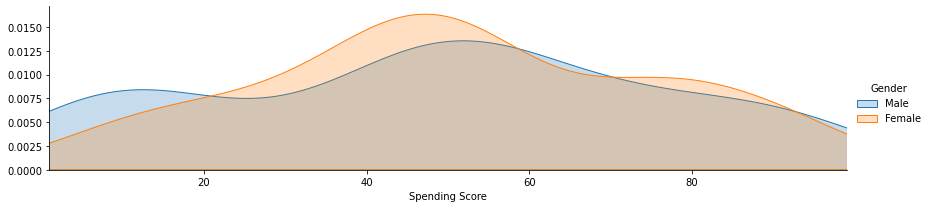

In [14]:
fig = sns.FacetGrid(df, hue="Gender", aspect=4)
fig.map(sns.kdeplot, 'Spending Score', shade=True)
fig.set(xlim=(df['Spending Score'].min(), df['Spending Score'].max()))
fig.add_legend();

In [15]:
# sns.lmplot('Age', 'Spending Score', data=df[df['Gender'] == 'Female']
# );
# plt.title('Age to Spending Score, Female Only');

## average spending score for male and female

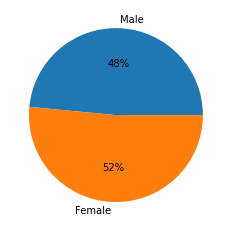

In [20]:
male_customers = df[df['Gender'] == 'Male']
female_customers = df[df['Gender'] == 'Female']
m=male_customers['Spending Score'].mean()
f=female_customers['Spending Score'].mean()

# plt.bar(1,m)
# plt.bar(2,f)
# plt.xticks([1, 2])
# plt.legend(["Male", "Female"]);


plt.pie([m,f],autopct='%1.0f%%', labels=['Male', 'Female']);


## Annual Income and Spending Score relationship

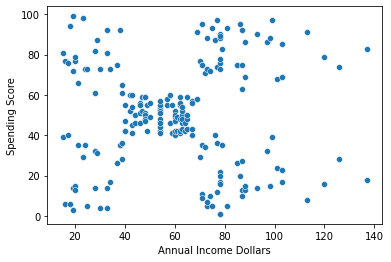

In [16]:
sns.scatterplot(data=df, y='Spending Score', x='Annual Income Dollars');